In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats

<img src="https://i0.wp.com/stringsmagazine.com/wp-content/uploads/2016/02/Titanic-e1630453763407.jpg?fit=800%2C450&ssl=1" width=500>

## 1. Simple Random Sampling and sampling distribution visualization
1. Load the Titanic dataset
2. Implement simple random sampling to select 100 passengers from the dataset
3. Compare the survival rate in your sample with the survival rate in the entire population
4. Repeat this process 1000 times and create a histogram of the sampling distribution of survival rates
5. Calculate the mean and standard error of this distribution. Compare it against the theoretical standard error.

In [2]:
# 1. Load the Titanic dataset
path_titanic = "https://raw.githubusercontent.com/Armagaan/noc26_cs86/refs/heads/main/data/titanic.csv"
titanic = pd.read_csv(path_titanic)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 2. Implement simple random sampling to select 100 passengers from the dataset
# 3. Compare the survival rate in your sample with the survival rate in the entire population
population_survival_rate = titanic['Survived'].mean()
population_survival_std = titanic['Survived'].std()
sample = titanic.sample(n=100, random_state=42)
sample_survival_rate = sample['Survived'].mean()

print(f"Population Survival Rate: {population_survival_rate:.4f}")
print(f"Sample Survival Rate: {sample_survival_rate:.4f}")

Population Survival Rate: 0.3838
Sample Survival Rate: 0.4000


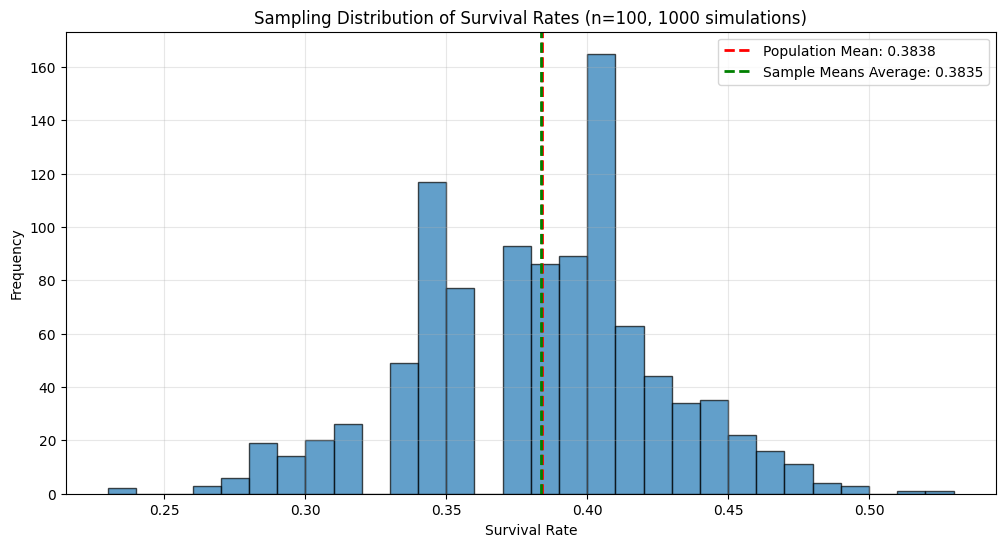

In [4]:
# 4. Repeat sampling 1000 times.
n_simulations = 1000
sample_size = 100
survival_rates = []

for i in range(n_simulations):
    sample = titanic.sample(n=sample_size, replace=False)
    survival_rates.append(sample['Survived'].mean())

survival_rates = np.array(survival_rates)

# 4. Create a histogram of the sampling distribution of survival rates.
fig, ax = plt.subplots(figsize=(12, 6))

# Histogram
ax.hist(survival_rates, bins=30, edgecolor='black', alpha=0.7)
# Marker for population mean
ax.axvline(
    population_survival_rate,
    linestyle='--',
    linewidth=2,
    color='red',
    label=f'Population Mean: {population_survival_rate:.4f}'
)
# Marker for sample mean
ax.axvline(
    survival_rates.mean(),
    linestyle='--',
    linewidth=2,
    color='green',
    label=f'Sample Means Average: {survival_rates.mean():.4f}'
)

ax.set(
    xlabel="Survival Rate",
    ylabel="Frequency",
    title="Sampling Distribution of Survival Rates (n=100, 1000 simulations)"
)
ax.legend()
ax.grid(True, alpha=0.3)
fig.show()

In [5]:
# 5. Calculate the mean and standard error of this distribution. Compare it against the theoretical standard error.
print("\n=== Sampling Distribution Statistics ===")
print(f"Mean: {survival_rates.mean():.4f}")
print(f"Standard deviation (Standard Error): {survival_rates.std():.4f}")
print(f"Theoretical Standard Error: {population_survival_std / np.sqrt(sample_size):.4f}")

# Additional analysis
print("\n=== Analysis ===")
print(f"The sample means are centered around the population mean.")


=== Sampling Distribution Statistics ===
Mean: 0.3835
Standard deviation (Standard Error): 0.0452
Theoretical Standard Error: 0.0487

=== Analysis ===
The sample means are centered around the population mean.


## 2. Stratified Random Sampling
1. Divide the Titanic passengers into strata based on passenger class (1st, 2nd, 3rd)
2. Implement stratified random sampling to select a proportional sample of 200 passengers
3. Compare the class distribution in your stratified sample with:
    - A simple random sample of 200 passengers
    - The original population
4. Calculate the mean fare for each sampling method and compare with the population mean
5. Which method gives a more representative sample? Justify your answer with statistics.


In [6]:
# 1. Divide the Titanic passengers into strata based on passenger class (1st, 2nd, 3rd)
# 2. Implement stratified random sampling to select a proportional sample of 200 passengers

sample_size = 200

# Calculate proportional sample sizes for each stratum
class_proportions = titanic['Pclass'].value_counts(normalize=True)
stratified_sample_sizes = (class_proportions * sample_size).round().astype(int)

print("=== Population Class Distribution ===")
print(class_proportions.sort_index())
print(f"\nPopulation Mean Fare: ${titanic['Fare'].mean():.2f}")

# Perform stratified sampling

# create an empty dataframe
stratified_sample = pd.DataFrame()
for pclass in [1, 2, 3]:
    # get the passenger class
    class_data = titanic[titanic['Pclass'] == pclass]
    # see how many data points to sample
    n_samples = stratified_sample_sizes[pclass]
    # sample the datapoints as a dataframe
    class_sample = class_data.sample(n=n_samples, random_state=42)
    # concatenate
    stratified_sample = pd.concat([stratified_sample, class_sample])

print("\n=== Stratified Sample ===")
print(f"Stratified Sample Class Distribution:")
print(stratified_sample['Pclass'].value_counts(normalize=True).sort_index())
print(f"\nStratified Sample Mean Fare: ${stratified_sample['Fare'].mean():.2f}")

=== Population Class Distribution ===
Pclass
1    0.242424
2    0.206510
3    0.551066
Name: proportion, dtype: float64

Population Mean Fare: $32.20

=== Stratified Sample ===
Stratified Sample Class Distribution:
Pclass
1    0.241206
2    0.206030
3    0.552764
Name: proportion, dtype: float64

Stratified Sample Mean Fare: $30.10


In [7]:
# 3. Simple Random Sample for comparison
simple_sample = titanic.sample(n=sample_size)
print("\n=== Simple Random Sample ===")
print(f"Simple Random Sample Class Distribution:")
print(simple_sample['Pclass'].value_counts(normalize=True).sort_index())
print(f"Simple Random Sample Mean Fare: ${simple_sample['Fare'].mean():.2f}")


=== Simple Random Sample ===
Simple Random Sample Class Distribution:
Pclass
1    0.24
2    0.23
3    0.53
Name: proportion, dtype: float64
Simple Random Sample Mean Fare: $34.64


In [8]:
comparison_df = pd.DataFrame({
    'Population': titanic['Pclass'].value_counts(normalize=True).sort_index(),
    'Stratified': stratified_sample['Pclass'].value_counts(normalize=True).sort_index(),
    'Simple Random': simple_sample['Pclass'].value_counts(normalize=True).sort_index()
})
comparison_df

,Population,Stratified,Simple Random
Pclass,,,
1,0.242424,0.241206,0.24
2,0.206510,0.206030,0.23
3,0.551066,0.552764,0.53


In [9]:
fare_comparison = pd.DataFrame({
    'Method': ['Population', 'Stratified', 'Simple Random'],
    'Mean Fare': [titanic['Fare'].mean(),
                  stratified_sample['Fare'].mean(),
                  simple_sample['Fare'].mean()]
})
fare_comparison

,Method,Mean Fare
0,Population,32.204208
1,Stratified,30.102679
2,Simple Random,34.641667


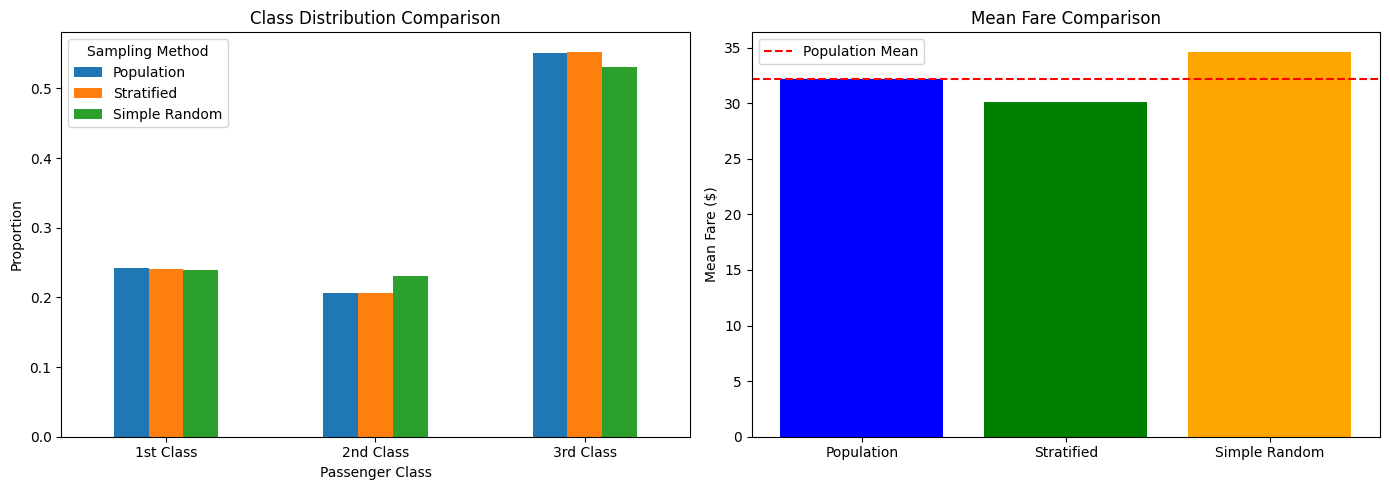

In [10]:
# 4. Comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Class distribution comparison
comparison_df.plot(kind='bar', ax=axes[0])
axes[0].set_title('Class Distribution Comparison')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Sampling Method')
axes[0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)

# Mean fare comparison
axes[1].bar(fare_comparison['Method'], fare_comparison['Mean Fare'],
            color=['blue', 'green', 'orange'])
axes[1].set_title('Mean Fare Comparison')
axes[1].set_ylabel('Mean Fare ($)')
axes[1].axhline(y=titanic['Fare'].mean(), color='red', linestyle='--',
                label='Population Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

<img src="https://www.digitaltrends.com/tachyon/2022/07/Xbox-Series-X-and-Playstation-5-ps5.jpg?resize=1200%2C720" width=500>

# 3.  Central Limit Theorem Demonstration

1. Load the Video Game Sales dataset.
2. Examine the distribution of Global Sales (plot histogram) - this is your population
3. Take samples of size n=5, n=10, n=30, and n=50. For each sample size:
   - Draw 500 random samples
   - Calculate the mean of each sample
   - Plot the sampling distribution of means
4. Compare how the sampling distributions change as n increases
5. Calculate the theoretical and actual standard error for each sample size
6. Verify that the Central Limit Theorem holds

In [11]:
path_vgsales = "https://raw.githubusercontent.com/Armagaan/noc26_cs86/refs/heads/main/data/vgsales.csv"
vgsales = pd.read_csv(path_vgsales)

print(f"Dataset size: {len(vgsales)}")
print(f"Population mean Global Sales: {vgsales['Global_Sales'].mean():.4f}")
print(f"Population std dev: {vgsales['Global_Sales'].std():.4f}")

vgsales.head()

Dataset size: 16598
Population mean Global Sales: 0.5374
Population std dev: 1.5550


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


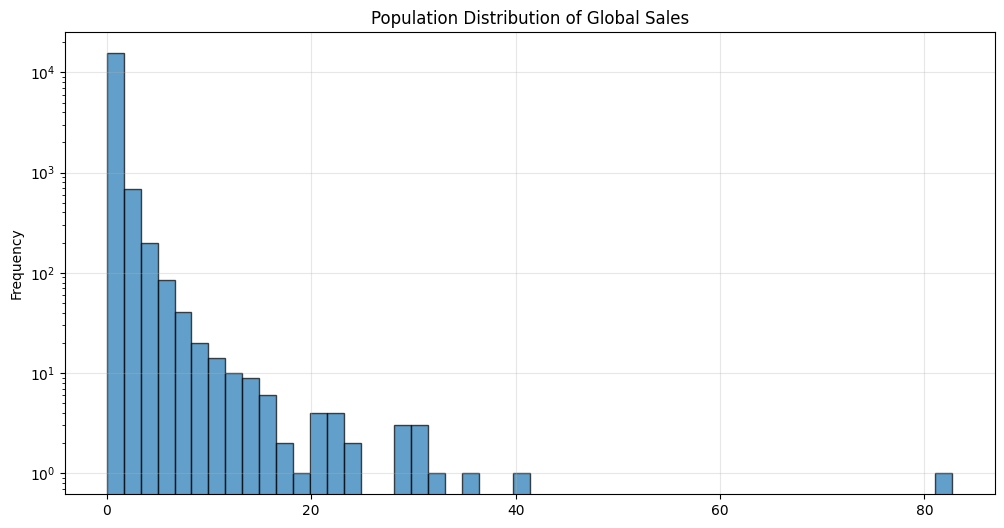


Note: The population distribution is highly right-skewed (not Normal)


In [12]:
vgsales["Global_Sales"].plot(
    kind="hist",
    bins=50,
    log=True,
    edgecolor="black",
    figsize=(12, 6),
    title="Population Distribution of Global Sales",
    x="Global Sales (millions)",
    y="Frequency",
    alpha=0.7,
)
plt.grid(True, alpha=0.3)
plt.show()

print("\nNote: The population distribution is highly right-skewed (not Normal)")

In [13]:
# sample_sizes = [5, 10, 30, 50]
sample_sizes = [10, 50, 100, 1000]
n_simulations = 500

# Store results
results = {}

# 3. For each sample size
for idx, n in enumerate(sample_sizes):
    sample_means = []

    # Draw samples and calculate means
    for i in range(n_simulations):
        sample = vgsales['Global_Sales'].sample(n=n, replace=True)
        sample_means.append(sample.mean())

    sample_means = np.array(sample_means)

    # Calculate statistics
    theoretical_se = vgsales['Global_Sales'].std() / np.sqrt(n)
    actual_se = sample_means.std()

    results[n] = {
        'mean': sample_means.mean(),
        'theoretical_se': theoretical_se,
        'actual_se': actual_se,
        'data': sample_means
    }

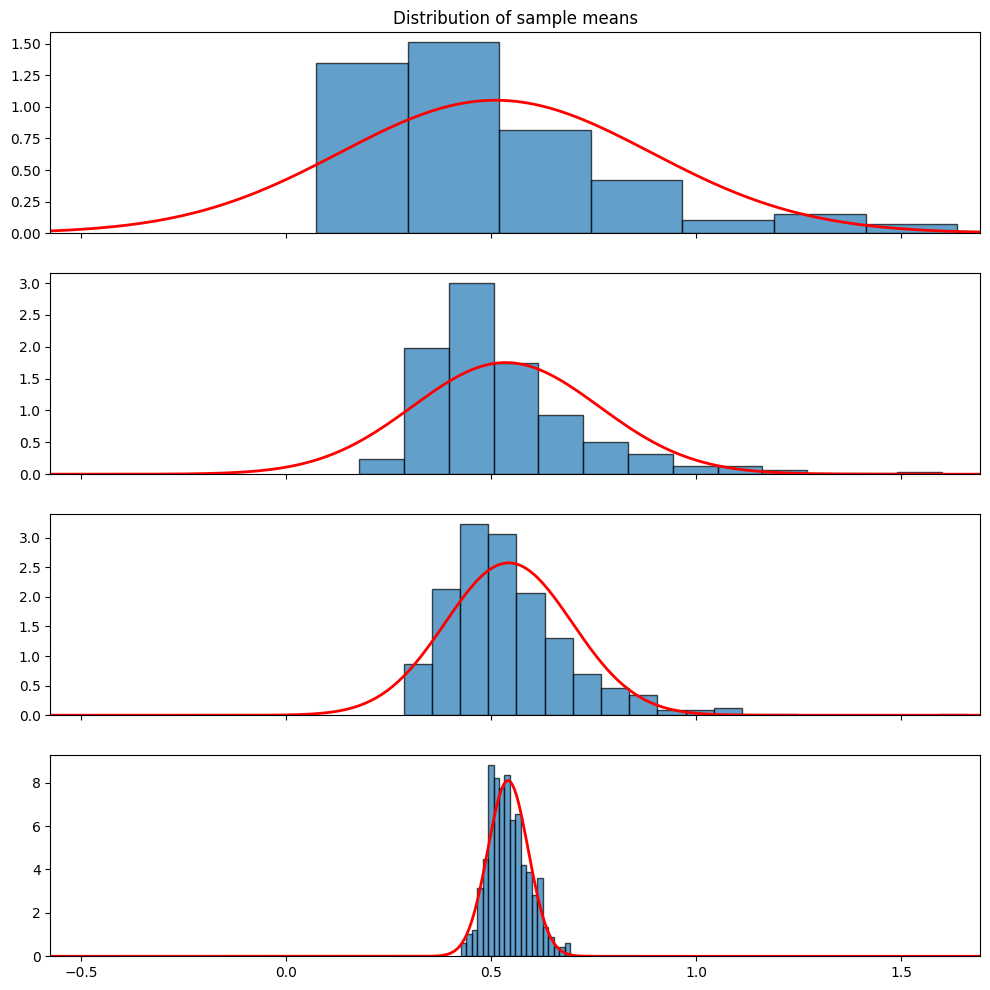

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), sharex=True)

axes[0].set_title("Distribution of sample means")

for idx, n in enumerate(sample_sizes):
    means_dist = results[n]['data']
    mu = means_dist.mean()
    sigma = means_dist.std()
    axes[idx].hist(
        means_dist,
        bins=20,
        density=True, # HW: check the documentation to find out what this does.
        edgecolor='black',
        alpha=0.7,
    )

    min = means_dist.min() - 1
    max = means_dist.max() + 1
    # Equally space 500 points
    x = np.linspace(min, max, 500)
    y = stats.norm.pdf(x, mu, sigma)
    axes[idx].plot(x, y, 'r-', linewidth=2, label='Normal Distribution')

    axes[idx].set_xlim(min, max)

plt.show()

# 4. Point Estimate vs. Confidence Interval

1. Load the Student Performance dataset
2. Calculate the point estimate (sample mean) for math scores
3. Construct a 95% confidence interval for the population mean math score (assume population σ = 15)
4. Repeat the process 50 times with different random samples of size 100
5. Count how many of these confidence intervals contain the true population mean
6. Explain the difference between point estimates and confidence intervals in terms of information provided

In [15]:
path_students = "https://raw.githubusercontent.com/Armagaan/noc26_cs86/refs/heads/main/data/StudentsPerformance.csv"
students = pd.read_csv(path_students)

# Check the data
print("Dataset shape:", students.shape)
print("\nFirst few rows:")
students.head()

Dataset shape: (1000, 8)

First few rows:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
# Focus on math scores
math_scores = students['math score']

# Population parameters (treating full dataset as population)
true_population_mean = math_scores.mean()
population_std = 15  # Given/assumed population standard deviation

print(f"\n{'='*70}")
print("POPULATION PARAMETERS")
print(f"{'='*70}")
print(f"True Population Mean: {true_population_mean:.4f}")
print(f"Population Std Dev (σ): {population_std}")
print(f"Population Size: {len(math_scores)}")


POPULATION PARAMETERS
True Population Mean: 66.0890
Population Std Dev (σ): 15
Population Size: 1000


In [17]:
# 1. Take one sample and calculate point estimate
sample_size = 100
sample = math_scores.sample(n=sample_size, random_state=42)

point_estimate = sample.mean()
print(f"\n{'='*70}")
print("SINGLE SAMPLE ANALYSIS")
print(f"{'='*70}")
print(f"Sample Size: {sample_size}")
print(f"Point Estimate (Sample Mean): {point_estimate:.4f}")


SINGLE SAMPLE ANALYSIS
Sample Size: 100
Point Estimate (Sample Mean): 63.9500


In [18]:
# 2. Construct 95% confidence interval
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1 - alpha/2)

standard_error = population_std / np.sqrt(sample_size)
margin_of_error = z_critical * standard_error

ci_lower = point_estimate - margin_of_error
ci_upper = point_estimate + margin_of_error

print(f"\n{'='*70}")
print("95% CONFIDENCE INTERVAL")
print(f"{'='*70}")
print(f"Confidence Level: {confidence_level*100}%")
print(f"Z-critical value: {z_critical:.4f}")
print(f"Standard Error: {standard_error:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Interval Width: {ci_upper - ci_lower:.4f}")
print(f"\nInterpretation: We are 95% confident that the true population mean")
print(f"math score lies between {ci_lower:.2f} and {ci_upper:.2f}")


95% CONFIDENCE INTERVAL
Confidence Level: 95.0%
Z-critical value: 1.9600
Standard Error: 1.5000
Margin of Error: 2.9399
95% Confidence Interval: [61.0101, 66.8899]
Interval Width: 5.8799

Interpretation: We are 95% confident that the true population mean
math score lies between 61.01 and 66.89


In [19]:
# 4. Repeat 50 times with different samples
n_simulations = 50
sample_size = 100

confidence_intervals = []
point_estimates = []
contains_true_mean = []

for i in range(n_simulations):
    # Draw sample
    sample = math_scores.sample(n=sample_size, replace=False, random_state=i)

    # Calculate point estimate
    point_est = sample.mean()
    point_estimates.append(point_est)

    # Calculate CI
    se = population_std / np.sqrt(sample_size)
    me = z_critical * se
    ci_low = point_est - me
    ci_high = point_est + me

    confidence_intervals.append((ci_low, ci_high))

    # Check if CI contains true mean
    contains = (ci_low <= true_population_mean <= ci_high)
    contains_true_mean.append(contains)

# Calculate coverage probability
coverage_probability = np.mean(contains_true_mean)

print(f"\n{'='*70}")
print("SIMULATION RESULTS (50 SAMPLES)")
print(f"{'='*70}")
print(f"Number of simulations: {n_simulations}")
print(f"CIs containing true mean: {sum(contains_true_mean)}")
print(f"Coverage probability: {coverage_probability*100:.2f}%")
print(f"Expected coverage: {confidence_level*100}%")


SIMULATION RESULTS (50 SAMPLES)
Number of simulations: 50
CIs containing true mean: 47
Coverage probability: 94.00%
Expected coverage: 95.0%
